## COMP 5413 
### Topics in Smart Health Informatics
#### Exploratory and Predictive Analysis of Chronic Kidney Diseases
Group Members:

1. Komal Barge (1095709)
2. Srushti Wadekar (1102484)
3. Nidhi Patel (1095526)

Chronic kidney disease (CKD) is an important public health problem worldwide, especially for underdeveloped countries. Chronic kidney disease means that the kidney is not working as expected and cannot filter blood properly. Approximately 10% of the world's population suffers from this disease and millions die every year. Recently, the number of patients who have reached renal insufficiency is increasing, which necessitates kidney transplant or dialysis. CKD does not show any symptoms in its early stages. The only way to find out if the patient has kidney disease is by testing. Early detection of CKD in its early stages can help the patient receive effective treatment.

The aim of this study is to analyze the methods and compare their accuracy values by using 5 different machine learning methods.

#### Load modules and helper function

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
kidneydf = pd.read_csv('kidney_disease.csv',index_col='id')

In [4]:
kidneydf.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
kidneydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

In [6]:
kidneydf.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#### Cleaning and preprocessing of data for training a classifier

Dataset consists of random and null values. we will replace it with median just to avoid outlier issues by looking at the above description of maximum and minimum value of the particular feature.

In [7]:
# Clean the 'classification' feature.
kidneydf.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [8]:
#Replacing random values
kidneydf.classification.replace('ckd\t','ckd',inplace=True)

In [9]:
# Clean the 'diabetes' feature.
kidneydf.dm.unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [10]:
#Replacing random values
kidneydf.dm.replace(' yes', 'yes',inplace = True)
kidneydf.dm.replace('\tno', 'no', inplace=True)
kidneydf.dm.replace('\tyes','yes',inplace=True)

In [11]:
#Clean 'Coronary artery disease' feature.
kidneydf.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [12]:
#Replacing random values
kidneydf.cad.replace('\tno','no',inplace=True)

In [13]:
#Clean 'Packed Cell volume' feature.
kidneydf.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [14]:
#Replacing random values.
kidneydf.pcv.replace('\t43','43',inplace=True)
kidneydf.pcv.replace('\t?','35',inplace=True)

In [15]:
#Convert its dtype from object to float64.
kidneydf.pcv = pd.to_numeric(kidneydf.pcv)

In [16]:
#Clean 'White blood cell count' feature.
kidneydf.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [17]:
#Replacing random values
kidneydf.wc.replace('\t6200','6200',inplace=True)
kidneydf.wc.replace('\t8400','8400',inplace=True)
kidneydf.wc.replace('\t?','7000',inplace=True)

In [18]:
#Convert its dtype from object to float64.
kidneydf.wc = pd.to_numeric(kidneydf.wc)

In [19]:
#Clean 'Red blood count cell' feature and convert its dtype from object to float64.
kidneydf.rc.unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [20]:
kidneydf.rc.replace('\t?','4.0',inplace=True)
kidneydf.rc = pd.to_numeric(kidneydf.rc)

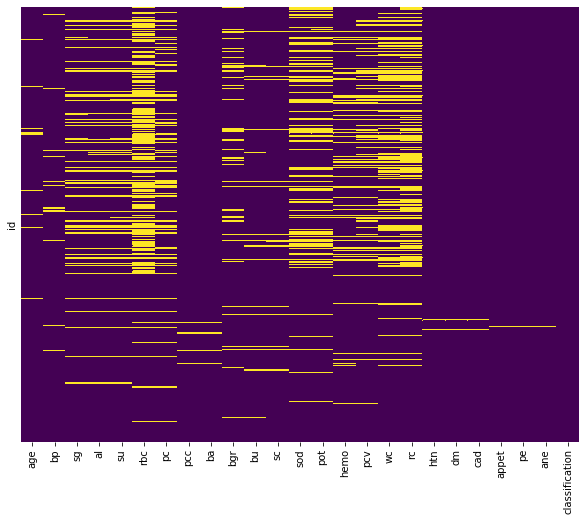

In [21]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(10,8))
sns.heatmap(kidneydf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#Total number of null values for each feature.
kidneydf.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [23]:
#Replace all the null values with feature's median value to avoid outlier issues.
kidneydf.fillna(kidneydf.median(), inplace=True)

#### Preprocess features with categorical values.

In [24]:
dtype_object=kidneydf.select_dtypes(include=['object'])
dtype_object.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [25]:
#Print the values for each feature present in the dataset.
for x in dtype_object.columns:
    print("{} unique values:".format(x),kidneydf[x].unique())
    print("*"*20)

rbc unique values: [nan 'normal' 'abnormal']
********************
pc unique values: ['normal' 'abnormal' nan]
********************
pcc unique values: ['notpresent' 'present' nan]
********************
ba unique values: ['notpresent' 'present' nan]
********************
htn unique values: ['yes' 'no' nan]
********************
dm unique values: ['yes' 'no' nan]
********************
cad unique values: ['no' 'yes' nan]
********************
appet unique values: ['good' 'poor' nan]
********************
pe unique values: ['no' 'yes' nan]
********************
ane unique values: ['no' 'yes' nan]
********************
classification unique values: ['ckd' 'notckd']
********************


In [26]:
# Manual dictionary for the replacement of each variable in proper way (This can be handled 
# with getdummies() function as well but which changes the column names which we didnot like, 
# hence replaced the value in this way).
dictonary = {
        "rbc": {
        "normal": 0,
        "abnormal":1,
    },
        "pc":{
        "normal": 0,
        "abnormal":1,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "present": 1,
        "notpresent":0,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    },
        "classification":{
        "ckd":1,
        "notckd":0,
    }
}

In [27]:
kidneydf.replace(dictonary,inplace=True)
kidneydf.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [28]:
#fill the null values in categorical attributes with median values/mode values
kidneydf.fillna(kidneydf.median(), inplace=True)

In [29]:
#Final check for null values in the dataset.
kidneydf.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

#### Exploratory analysis of the Chronic Kidney Disease dataset.

##### 1. Heatmap showing correlationship between each feature

As, you can see from this heatmap that diabetes(dm) and hypertension(htn) are highly correlated to target classification feature variable.

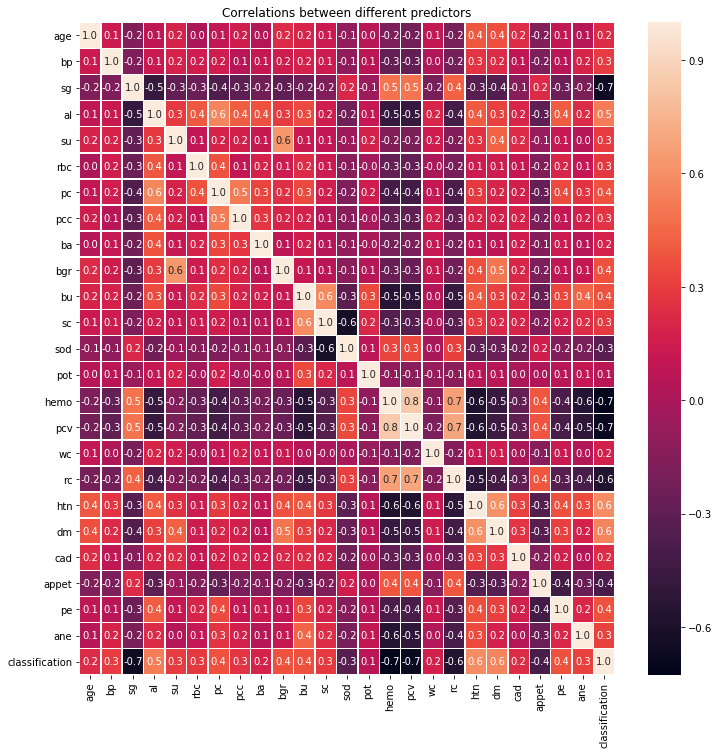

In [30]:
#plt.figure(figsize=(12,8))
#sns.heatmap(kidneydf.corr(),)

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(kidneydf.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

##### 2. Countplot for age vs CKD patients count values.

This graph represents that most of the patients are in the age range of 45-76. There is a sudden spike in number of patients after age 45.From graph legends, Blue is for nonCKD and Orange stick is for CKD patients.

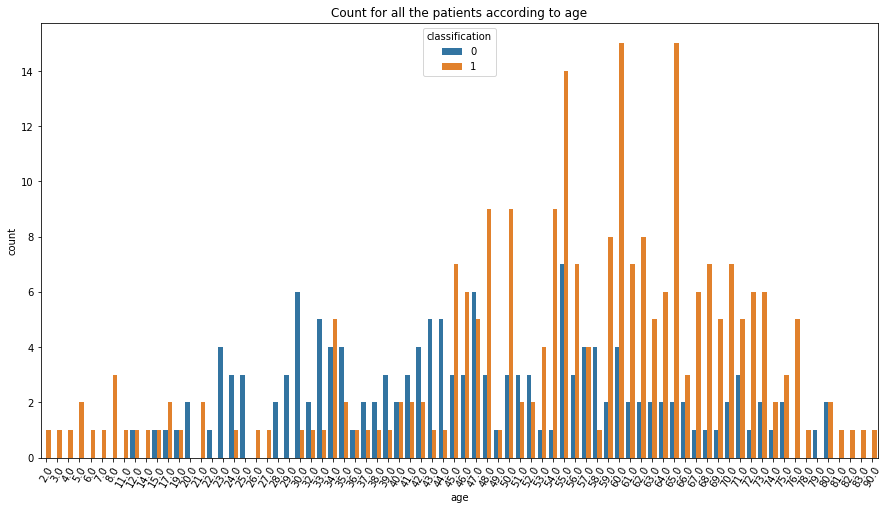

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=kidneydf,hue='classification')
plt.xticks(rotation=60)
plt.title('Count for all the patients according to age')
plt.show()

##### 3. Lineplot for Age vs BloodPressure values

This graph entails that people with high blood pressure people with age 50+ are mostly targeted group of CKD whereas, people in age range of 15-30 have shown CKD results with low blood pressure symptoms.

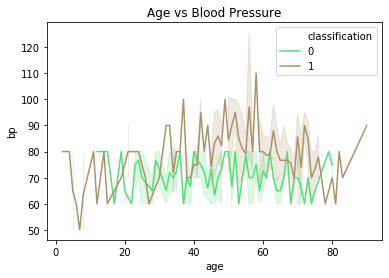

In [32]:
sns.lineplot(x='age',y='bp',data=kidneydf,hue='classification',palette='terrain')
plt.title('Age vs Blood Pressure')
plt.show()

##### 5. Lineplot for Age vs Hemoglobin values

This graph represents that people with high hemoglobin are mostly not afftected by CKD whereas, 50+ age group having less than 12 hemoglobin values are potentially vulnerable to CKD.

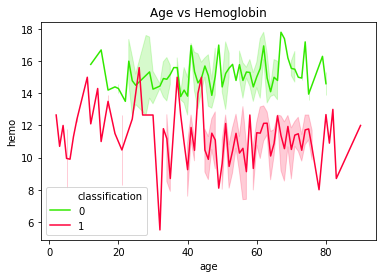

In [33]:
sns.lineplot(x='age',y='hemo',data=kidneydf,hue='classification',palette='prism')
plt.title('Age vs Hemoglobin')
plt.show()

##### 6. Lineplot for Age vs sugar values

This graph gives the most important detail about the sugar values, that all of the nonCKD patients are having zero sugar values whereas, zero sugar value does not exactly entails that you are not vulnerable to CKD.

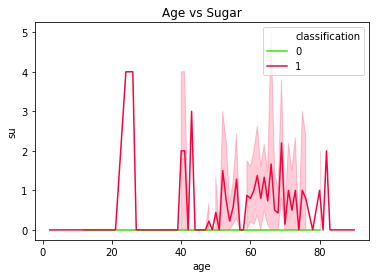

In [34]:
sns.lineplot(x='age',y='su',data=kidneydf,hue='classification',palette='prism')
plt.title('Age vs Sugar')
plt.show()

##### 7. Facetgrid with diabetes, hypertension and hemoglobin values altogether.

This facetgrid shows that nonCKD patients has no history of diabetes or hypertension disorders but, people with the same trait with the hemoglobin lower than 12.5 values are potential victims of the CKD. On the other hand, most of the patients with either diabetes or hypertension are having CKD. The patients with both the disorders are mostly over 40+.

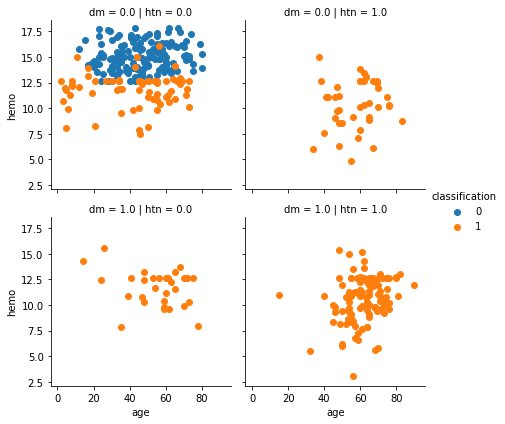

In [35]:
g = sns.FacetGrid(kidneydf, col="htn",  row="dm",hue='classification')
g = g.map(plt.scatter, "age", "hemo").add_legend()

##### 8. Countplot for classification variable.

NonCKD patients are 150 whereas, CKD patients are 250.

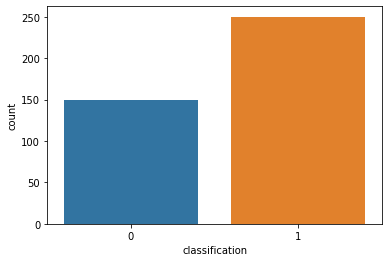

In [36]:
sns.countplot(x='classification',data=kidneydf)

#### Split the dataset into training set and testing set

In [37]:
from sklearn.model_selection import train_test_split

X = kidneydf.drop('classification',axis=1)
y = kidneydf['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_ckd = X[X.classification==0]
ckd = X[X.classification==1]

##### Random sampling with a bootstrap step

In [38]:
from sklearn.utils import resample

# Sampling on the minority class label
sample = resample(not_ckd,
                          replace=True, # sampling with replacement
                          n_samples=len(ckd), # Matching the number of ckd classes
                          random_state=27) 

sampledData = pd.concat([ckd, sample])

# Generating training and testing sets from sampled data
y_train = sampledData.classification.values
X_train = sampledData.drop('classification', axis=1).values
X_test = X_test.values
y_test = y_test.values

#### Feature Scaling on training and testing feature values if any outliers are there.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Modelling on Artificial Neural Networks.

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [41]:
model = Sequential()

# input layer
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=2,activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [42]:
#Convert the classification labels to categorical matrix because of the softmax layer probability outputs.
from keras.utils import np_utils
yTrain = np_utils.to_categorical(y_train, num_classes=2)
yTest = np_utils.to_categorical(y_test, num_classes=2)

Using TensorFlow backend.


In [43]:
model.fit(x=X_train, 
          y=yTrain, 
          epochs=100,
          batch_size=128)

Train on 372 samples
Epoch 1/100
372/372 [==============================] - 1s 2ms/sample - loss: 0.6876 - accuracy: 0.4933
Epoch 2/100
372/372 [==============================] - 0s 27us/sample - loss: 0.6818 - accuracy: 0.5430
Epoch 3/100
372/372 [==============================] - 0s 24us/sample - loss: 0.6595 - accuracy: 0.6183
Epoch 4/100
372/372 [==============================] - 0s 27us/sample - loss: 0.6376 - accuracy: 0.7231
Epoch 5/100
372/372 [==============================] - 0s 29us/sample - loss: 0.6239 - accuracy: 0.7715
Epoch 6/100
372/372 [==============================] - 0s 27us/sample - loss: 0.5959 - accuracy: 0.7957
Epoch 7/100
372/372 [==============================] - 0s 29us/sample - loss: 0.5719 - accuracy: 0.8172
Epoch 8/100
372/372 [==============================] - 0s 27us/sample - loss: 0.5362 - accuracy: 0.8306
Epoch 9/100
372/372 [==============================] - 0s 32us/sample - loss: 0.5104 - accuracy: 0.8306
Epoch 10/100
372/372 [======================

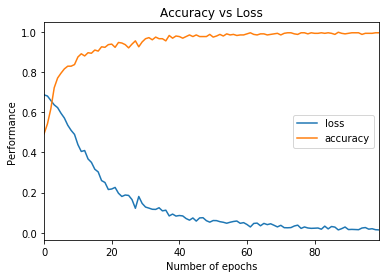

In [44]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'accuracy']].plot()
plt.title('Accuracy vs Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Performance')
plt.legend(loc='center right')
plt.show()

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)
print('Classification report for ANN: \n')
print(classification_report(y_test, predictions))
print('Confusion matrix for ANN: \n')
print(confusion_matrix(y_test,predictions))

Classification report for ANN: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.98      0.99        64

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion matrix for ANN: 

[[36  0]
 [ 1 63]]


In [46]:
#Import essential libraries for modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Text(0, 0.5, 'Error Rate')

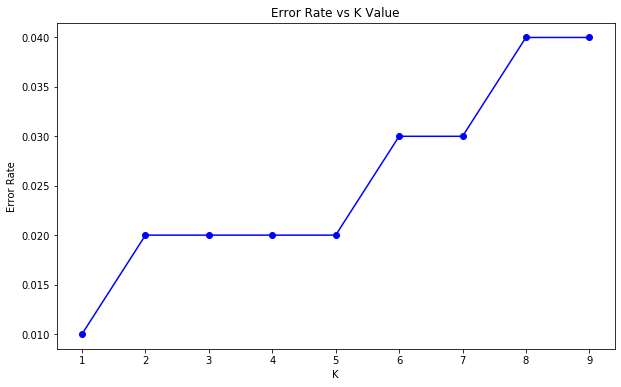

In [47]:
# Function to show error rate for different values of k before chosing optimal k value
error = []

for i in range(1,10):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(X_train,y_train)
    predict = knnModel.predict(X_test)
    error.append(np.mean(predict != y_test))
    

# Plotting the error rate for different values of k
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error,color='blue',marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Hyperparamter tuning using Random Search for Random Forest algorithm 

In [48]:
n_estimators = [int(x) for x in range(100,210,10)]
max_depth = [int(x) for x in range(10,110,10)]
bootstrap = [True, False]

hyperParameterGrid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'bootstrap': bootstrap}

print(hyperParameterGrid)

{'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'bootstrap': [True, False]}


In [49]:
# Function to train using random search
from sklearn.model_selection import RandomizedSearchCV

RFModel_RandomSearch = RandomForestClassifier()

randomSearchModel = RandomizedSearchCV(estimator = RFModel_RandomSearch, param_distributions = hyperParameterGrid, n_iter = 10, cv = 3, verbose=1, random_state=101)
randomSearchModel.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [50]:
randomSearchModel.best_params_

{'n_estimators': 110, 'max_depth': 40, 'bootstrap': True}

#### Modelling with K Nearest Neighbor, Decision Tree, Support Vector Machine, Random Forest algorithms

In [51]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelDtree = DecisionTreeClassifier()
modelSVC = SVC()

In [52]:
modelKNN.fit(X_train, y_train)
modelDtree.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
predKNN = modelKNN.predict(X_test)
predDtree = modelDtree.predict(X_test)
predRfc = randomSearchModel.predict(X_test)
predSVC = modelSVC.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

print("KNN\n",classification_report(y_test, predKNN))
print("Decision Tree\n",classification_report(y_test, predDtree))
print("Random Forest\n",classification_report(y_test, predRfc))
print("SVC\n",classification_report(y_test, predSVC))

KNN
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.98        64

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Decision Tree
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.98        64

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Random Forest
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.98      0.99        64

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      

In [55]:
print("KNN\n",confusion_matrix(y_test, predKNN))
print("Decision Tree\n",confusion_matrix(y_test, predDtree))
print("Random Forest\n",confusion_matrix(y_test, predRfc))
print("SVC\n",confusion_matrix(y_test, predSVC))

KNN
 [[36  0]
 [ 2 62]]
Decision Tree
 [[36  0]
 [ 2 62]]
Random Forest
 [[36  0]
 [ 1 63]]
SVC
 [[36  0]
 [ 4 60]]


In this study, we predicted the occurrence of Chronic Kidney Disease (CKD) at early stages in advance by studying the different traits of the patient. The models that we used for predicting the occurrence of disease were a simple feed-forward neural network, KNN classification model, random forest, decision tree and support vector machine. For our dataset, the ANN model performed the best among all the five models. Random forest and KNN too showed some promising results by giving good percentage of sensitivity and specificity. On the other hand, decision tree and support vector machine showed some misclassification in the false positive and false negative results which is highly risky in the medicine domain. In our future work, we can try to expand our dataset by gathering more and a variety of instances of patient information. Therefore, for our future scope we can try to decrease the overfitting issue by collecting more instances which can lead our study to predict the chronic kidney disease occurrence more precisely.